In [5]:
#Replace the array elements with their square values if element is an even number keep the odd number as such
import numpy as np

array = np.arange(12).reshape(3, 4)

result = np.where(array % 2 == 0, array ** 2, array)

print("assumed array:")
print(array)

print("\n Changed Array:")
print(result)

assumed array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

 Changed Array:
[[  0   1   4   3]
 [ 16   5  36   7]
 [ 64   9 100  11]]


In [30]:
#Read 10 records from dataframe and convert into json format and print the data
import pandas as pd

data = {
    'Age':[10.8, 11.8, 12.2, 13.2, 13.7, 13.8, 14, 14.1, 14.1, 14.1],
    'Weight':[48.8, 41, 46, 71, 53.8, 53.4, 46, 50, 47.2, 49.7],
    'Height':[163,150, 160,190, 169.7, 171, 160, 168.9, 160.2, 160.1],
    'Humidity':[39,41,37,49,40,42,40,42,40,40],
    'Temperature':[20.7, 22.3, 21.5, 23.8, 25.3, 24.4, 25.3, 24.2, 25.2, 25.8],
    'Sex':[1,1,0,1,0,0,0,0,0,0],
    'ID':[543, 11, 829, 284, 341, 341, 343, 330, 338, 339],
    'ID_test':['543_1','11_1','829_1','284_1','341_1','341_2','343_1','330_1','338_1','339_1']
}
df = pd.DataFrame(data)

json_data = df.head(10).to_json(orient='records', indent=4)


print(json_data)

[
    {
        "Age":10.8,
        "Weight":48.8,
        "Height":163.0,
        "Humidity":39,
        "Temperature":20.7,
        "Sex":1,
        "ID":543,
        "ID_test":"543_1"
    },
    {
        "Age":11.8,
        "Weight":41.0,
        "Height":150.0,
        "Humidity":41,
        "Temperature":22.3,
        "Sex":1,
        "ID":11,
        "ID_test":"11_1"
    },
    {
        "Age":12.2,
        "Weight":46.0,
        "Height":160.0,
        "Humidity":37,
        "Temperature":21.5,
        "Sex":0,
        "ID":829,
        "ID_test":"829_1"
    },
    {
        "Age":13.2,
        "Weight":71.0,
        "Height":190.0,
        "Humidity":49,
        "Temperature":23.8,
        "Sex":1,
        "ID":284,
        "ID_test":"284_1"
    },
    {
        "Age":13.7,
        "Weight":53.8,
        "Height":169.7,
        "Humidity":40,
        "Temperature":25.3,
        "Sex":0,
        "ID":341,
        "ID_test":"341_1"
    },
    {
        "Age":13.8,
        "Weigh

In [26]:
#Who is the youngest athlete and how many tests did she take part in?
import pandas as pd
df = pd.read_csv('Desktop/Python/subject-info.csv')
df.head()
youngest_age = df['Age'].min()
youngest_athlete = df[df['Age'] == youngest_age]
print("Youngest Athlete(s):")
print(youngest_athlete[[ 'Age']])
female_df = df[df['Sex'] == '1']  
female_tests_count = female_df.shape[0]
print(f"\nNumber of tests female athletes participated in: {female_tests_count}")

Youngest Athlete(s):
    Age
0  10.8

Number of tests female athletes participated in: 0


In [51]:
#Find the average HRV for individual athletes, using short-term variability analysis(RMSSD).
import numpy as np
import pandas as pd

#def calculate_rmssd(rr_intervals):
  
#  rr_diff = np.diff(rr_intervals)
#  rmssd = np.sqrt(np.mean(rr_diff**2))
#  return rmssd

# Load file
df = pd.read_csv('Desktop/Python/test_measure.csv')

# Preview the data
df.head()

df['HR'] = df['HR'].astype(float)


def calculate_rmssd(rr_intervals):
    rr_intervals = np.array(rr_intervals)
    diff = np.diff(rr_intervals)
    squared_diff = diff ** 2
    rmssd = np.sqrt(np.mean(squared_diff))
    return rmssd


# Group HR data by athlete ID
grouped_rr = df.groupby('ID')['HR'].apply(list).reset_index()

# Apply RMSSD calculation
grouped_rr['HRV'] = grouped_rr['HR'].apply(calculate_rmssd)

# Show results
print(grouped_rr[['ID', 'HRV']])




      ID       HRV
0      1       NaN
1      2       NaN
2      3  1.367189
3      4  0.852386
4      5       NaN
..   ...       ...
852  853       NaN
853  854  5.161059
854  855       NaN
855  856  1.314612
856  857  0.849185

[857 rows x 2 columns]


In [75]:
#Identify the test that took the longest time to complete.
import pandas as pd

# Load your CSV
df = pd.read_csv('Desktop/Python/test_measure.csv')

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Clean data
df = df.dropna(subset=['time', 'id_test'])
df['time'] = pd.to_numeric(df['time'], errors='coerce')

# Compute duration
duration_df = df.groupby('id_test')['time'].agg(['min', 'max']).reset_index()
duration_df['duration'] = duration_df['max'] - duration_df['min']

# Find longest test
longest_test = duration_df.loc[duration_df['duration'].idxmax()]

print("Patient ID with the longest test duration:")
print(f"ID_test: {longest_test['id_test']}")
print(f"Duration: {longest_test['duration']} seconds")




Patient ID with the longest test duration:
ID_test: 699_1
Duration: 1712 seconds


In [73]:
#Perform an EDA of subject_info using YDATA Profiling.
import pandas as pd
from ydata_profiling import ProfileReport

# Step 1: Load the dataset
df = pd.read_csv('Desktop/Python/test_measure.csv')

# Step 2: Generate the profile report
profile = ProfileReport(df, title="EDA Report - Subject Info", explorative=True)

# Step 3: Display report in notebook
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 11.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

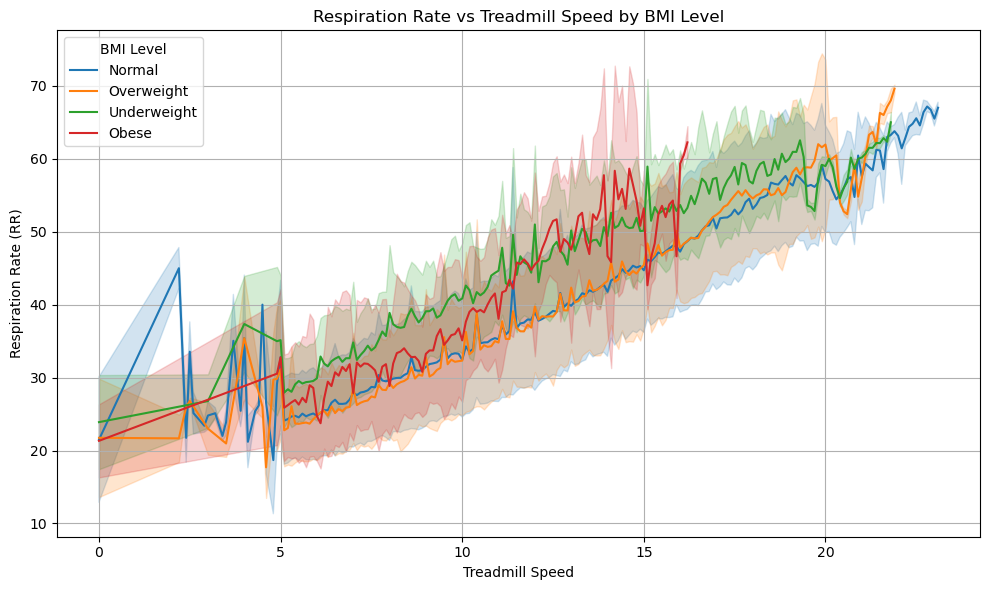

Average RR by BMI Level:
 bmi_level
Underweight    41.527322
Normal         36.947823
Overweight     35.637972
Obese          35.439317
Name: rr, dtype: float64

BMI level with highest mean RR: Underweight


In [6]:
#How does respiration rate progress based on treadmill speed for different BMI levels? 
#Visualize this relationship and find which BMI level has the highest mean respiration rate?"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and merge your datasets (if not already done)
df_subject = pd.read_csv('Desktop/Python/subject-info.csv')
df_test = pd.read_csv('Desktop/Python/test_measure.csv')


# Normalize columns
df_subject.columns = df_subject.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.strip().str.lower()

# Merge on 'id'
df = pd.merge(df_test, df_subject, on='id', how='inner')

# Calculate BMI
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)

# Step 1: Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_level'] = df['bmi'].apply(categorize_bmi)

# Step 2: Plot RR vs Speed, colored by BMI level
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='speed', y='rr', hue='bmi_level', errorbar='sd')
plt.title("Respiration Rate vs Treadmill Speed by BMI Level")
plt.xlabel("Treadmill Speed")
plt.ylabel("Respiration Rate (RR)")
plt.legend(title="BMI Level")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Find BMI level with highest mean RR
mean_rr_by_bmi = df.groupby('bmi_level')['rr'].mean().sort_values(ascending=False)
print("Average RR by BMI Level:\n", mean_rr_by_bmi)
print("\nBMI level with highest mean RR:", mean_rr_by_bmi.idxmax())


In [8]:
#Identify cases of possible bradycardia at rest and display number of athletes based on gender.
import pandas as pd

# Load and merge datasets (if not already done)
df_subject = pd.read_csv('Desktop/Python/subject-info.csv')
df_test = pd.read_csv('Desktop/Python/test_measure.csv')


# Clean column names
df_subject.columns = df_subject.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.strip().str.lower()

# Merge on 'id'
df = pd.merge(df_test, df_subject, on='id', how='inner')

# Convert gender column if needed (e.g., 1 = Male, 0 = Female)
df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})

# Filter to RESTING condition (assuming speed <= 1 is resting)
resting_df = df[df['speed'] <= 1]

# Identify potential bradycardia cases (HR < 60)
bradycardia_df = resting_df[resting_df['hr'] < 60]

# Get unique athletes with bradycardia at rest
bradycardia_athletes = bradycardia_df[['id', 'sex']].drop_duplicates()

# Count number of athletes by gender
count_by_gender = bradycardia_athletes['sex'].value_counts()

print("Number of athletes with bradycardia at rest by gender:\n")
print(count_by_gender)


Number of athletes with bradycardia at rest by gender:

sex
Female    83
Male      11
Name: count, dtype: int64


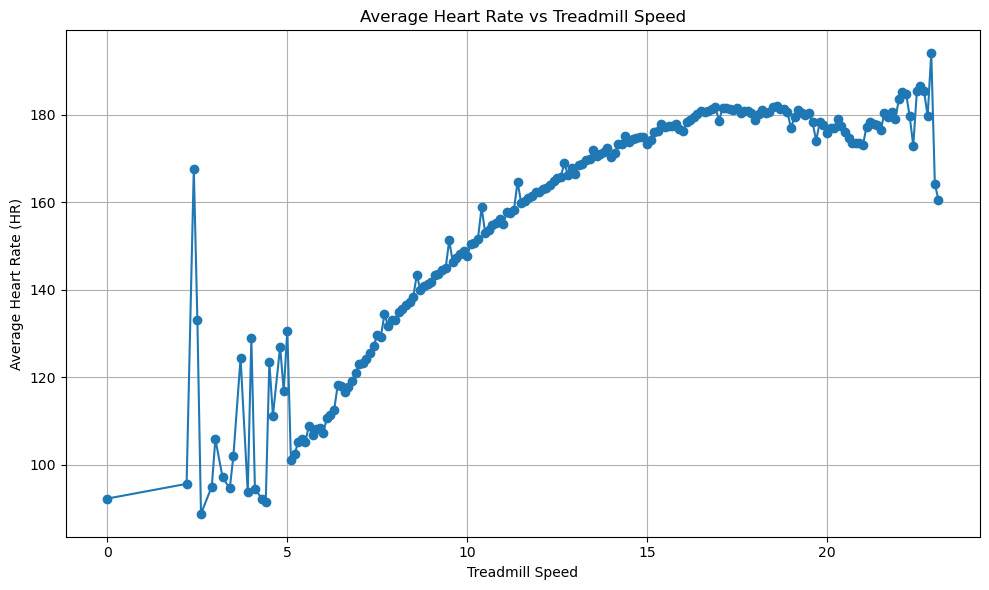

In [10]:
#Calculate the average heart rate corresponding to the speed of the treadmill and  plot a line graph to visualize the relationship.
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and merge (if not already done)
df_subject = pd.read_csv('Desktop/Python/subject-info.csv')
df_test = pd.read_csv('Desktop/Python/test_measure.csv')

# Clean column names
df_subject.columns = df_subject.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.strip().str.lower()

# Merge on 'id'
df = pd.merge(df_test, df_subject, on='id', how='inner')

# Step 2: Group by speed and calculate average HR
avg_hr_by_speed = df.groupby('speed')['hr'].mean().reset_index()

# Step 3: Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(avg_hr_by_speed['speed'], avg_hr_by_speed['hr'], marker='o', linestyle='-')
plt.title('Average Heart Rate vs Treadmill Speed')
plt.xlabel('Treadmill Speed')
plt.ylabel('Average Heart Rate (HR)')
plt.grid(True)
plt.tight_layout()
plt.show()


Average HR at different test stages:

stage
Start     106.222422
Middle    153.858723
End       163.839579
Name: hr, dtype: float64


/var/folders/ns/pr2mpxsj0vq12mcc8gdkjfl80000gn/T/ipykernel_66243/2943975195.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_labeled = df_test.groupby('id_test').apply(label_test_stage).reset_index(drop=True)
/var/folders/ns/pr2mpxsj0vq12mcc8gdkjfl80000gn/T/ipykernel_66243/2943975195.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hr_by_stage = df_labeled.groupby('stage')['hr'].mean()


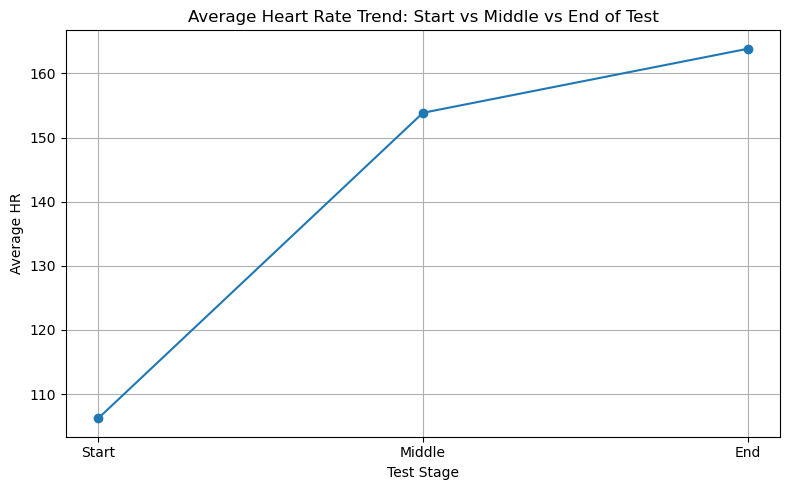

In [16]:
#Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend?

import pandas as pd

# Load the test measurements
df_test = pd.read_csv('Desktop/Python/test_measure.csv')
df_test.columns = df_test.columns.str.strip().str.lower()

# Step 1: Define a function to label each time point
def label_test_stage(df):
    # Sort by time for each test
    df = df.sort_values(by='time')
    total_time = df['time'].max()
    df['stage'] = pd.cut(
        df['time'],
        bins=[-1, total_time * 0.33, total_time * 0.66, total_time + 1],
        labels=['Start', 'Middle', 'End']
    )
    return df

# Step 2: Apply the stage labeling by each test
df_labeled = df_test.groupby('id_test').apply(label_test_stage).reset_index(drop=True)
#above line is deprecated
#df_labeled = df_test.groupby('id_test', group_keys=False).apply(label_test_stage).reset_index(drop=True)


# Step 3: Calculate average HR for each stage
avg_hr_by_stage = df_labeled.groupby('stage')['hr'].mean()

print("Average HR at different test stages:\n")
print(avg_hr_by_stage)

# Optional: plot the trend
import matplotlib.pyplot as plt

avg_hr_by_stage = avg_hr_by_stage.reindex(['Start', 'Middle', 'End'])  # Ensure correct order

plt.figure(figsize=(8, 5))
plt.plot(avg_hr_by_stage.index, avg_hr_by_stage.values, marker='o')
plt.title('Average Heart Rate Trend: Start vs Middle vs End of Test')
plt.xlabel('Test Stage')
plt.ylabel('Average HR')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#Find the oldest athlete in the dataset and determine the number of breaths recorded for the oldest athlete during the test.

import pandas as pd

# Step 1: Load both datasets
df_subject = pd.read_csv('Desktop/Python/subject-info.csv')
df_test = pd.read_csv('Desktop/Python/test_measure.csv')

# Clean column names
df_subject.columns = df_subject.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.strip().str.lower()

# Step 2: Find the oldest athlete
oldest_age = df_subject['age'].max()
oldest_athlete = df_subject[df_subject['age'] == oldest_age]

print("Oldest athlete info:\n", oldest_athlete[['id', 'age']])

# Step 3: Get their ID
oldest_id = oldest_athlete.iloc[0]['id']

# Step 4: Filter test data for this athlete
df_oldest = df_test[df_test['id'] == oldest_id]

# Step 5: Count number of valid RR records (non-null)
num_breaths = df_oldest['rr'].dropna().count()

print(f"\nNumber of breaths (RR records) recorded for athlete ID {oldest_id}: {num_breaths}")


Oldest athlete info:
       id   age
991  296  63.0

Number of breaths (RR records) recorded for athlete ID 296: 345


In [20]:
#Assuming age is given for the current year(2025) , list the participants born on leap year

import pandas as pd

# Load subject-info.csv
df_subject = pd.read_csv('Desktop/Python/subject-info.csv')
df_subject.columns = df_subject.columns.str.strip().str.lower()

# Calculate year of birth
df_subject['year_of_birth'] = 2025 - df_subject['age']

# Define leap year check function
def is_leap_year(year):
    return (year % 4 == 0) and (year % 100 != 0 or year % 400 == 0)

# Apply leap year check
df_subject['leap_year'] = df_subject['year_of_birth'].apply(is_leap_year)

# Filter only leap-year born participants
leap_year_participants = df_subject[df_subject['leap_year']]

# Display relevant info
print("Participants born in leap years:")
print(leap_year_participants[['id', 'age', 'year_of_birth']])


Participants born in leap years:
      id   age  year_of_birth
113  177  17.0         2008.0
114  303  17.0         2008.0
115  346  17.0         2008.0
116  637  17.0         2008.0
244   83  21.0         2004.0
245  458  21.0         2004.0
246  773  21.0         2004.0
404   84  25.0         2000.0
405  183  25.0         2000.0
406  255  25.0         2000.0
407  263  25.0         2000.0
408  353  25.0         2000.0
409  391  25.0         2000.0
410  493  25.0         2000.0
555  491  29.0         1996.0
556  566  29.0         1996.0
557  857  29.0         1996.0
664  103  33.0         1992.0
665  763  33.0         1992.0
764   95  37.0         1988.0
765  196  37.0         1988.0
766  236  37.0         1988.0
767  253  37.0         1988.0
768  630  37.0         1988.0
769  632  37.0         1988.0
852  101  41.0         1984.0
853  363  41.0         1984.0
917  450  45.0         1980.0


Columns in the dataset: Index(['time', 'speed', 'hr', 'vo2', 'vco2', 'rr', 've', 'id_test_x', 'id',
       'age', 'weight', 'height', 'humidity', 'temperature', 'sex',
       'id_test_y'],
      dtype='object')


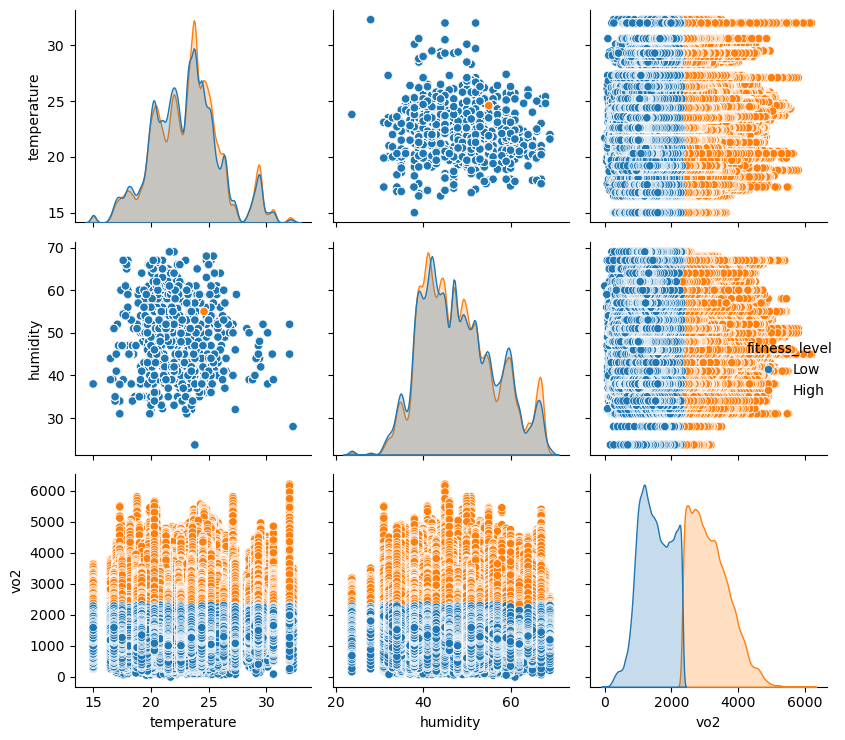

In [28]:
#"Use a pairplot to analyze the relationship between temperature, humidity, and  VO2 max (ml/kg/min) across different fitness levels

#Hint :Classify ""Fitness Level"" as ""Low"" if VO2 max (ml/kg/min) is below the median, otherwise classify as ""High."

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the subject-info and test_measure datasets
df_subject = pd.read_csv('Desktop/Python/subject-info.csv')
df_test = pd.read_csv('Desktop/Python/test_measure.csv')

# Clean column names
df_subject.columns = df_subject.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.strip().str.lower()

# Merge both datasets based on 'id'
df = pd.merge(df_test, df_subject, on='id', how='inner')

# Step 1: Check the columns to ensure correct ones are available
print("Columns in the dataset:", df.columns)

# Ensure 'temperature', 'humidity', 'vo2' are in the dataframe and have no missing values
df = df[['temperature', 'humidity', 'vo2']].dropna()  # Drop rows with any NaN values

# Step 2: Calculate the median VO2 max to classify fitness level
median_vo2max = df['vo2'].median()

# Step 3: Classify fitness level based on VO2 max
df['fitness_level'] = df['vo2'].apply(lambda x: 'High' if x >= median_vo2max else 'Low')

# Step 4: Create a pairplot to visualize relationships (only using relevant columns)
sns.pairplot(df[['temperature', 'humidity', 'vo2', 'fitness_level']], hue='fitness_level')

# Step 5: Display the plot
plt.tight_layout()
plt.show()



In [39]:
#Connect to database using PostgreSQL and increase the temperature 2 degrees for participant with maximum humidity and display the result 

import pandas as pd

# Step 1: Load the CSV files into DataFrames
df_subject = pd.read_csv('Desktop/Python/subject-info.csv')
df_test = pd.read_csv('Desktop/Python/test_measure.csv')

# Clean column names (strip spaces and convert to lowercase)
df_subject.columns = df_subject.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.strip().str.lower()

# Step 3: Find the participant with the maximum humidity from subject-info.csv
max_humidity_participant = df_subject.loc[df_subject['humidity'].idxmax()]
print(f"\nParticipant with Maximum Humidity: {max_humidity_participant['id']}, Humidity: {max_humidity_participant['humidity']}")

# Step 4: Increase the temperature by 2 degrees for this participant in subject-info.csv
participant_id = max_humidity_participant['id']

# Ensure the 'temperature' column exists in df_subject before updating
if 'temperature' in df_subject.columns:
    df_subject.loc[df_subject['id'] == participant_id, 'temperature'] += 2  # Increase the temperature by 2 degrees
    print(f"\nTemperature for participant {participant_id} updated by 2 degrees.")
else:
    print("\nNo 'temperature' column found in subject-info.csv.")

# Step 5: Display the updated result for this participant
updated_participant = df_subject[df_subject['id'] == participant_id]
print(f"\nUpdated Participant Data (ID: {participant_id}):\n", updated_participant[['id', 'temperature']])



Participant with Maximum Humidity: 9, Humidity: 69.0

Temperature for participant 9 updated by 2 degrees.

Updated Participant Data (ID: 9):
      id  temperature
386   9         24.0
